In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [7]:
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names

In [8]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# 4. Second split: train and validation (75% train, 25% validation of the 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Train size: {X_train.shape[0]}")
print(f"Validation size: {X_val.shape[0]}")
print(f"Test size: {X_test.shape[0]}")


Train size: 90
Validation size: 30
Test size: 30


In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

In [12]:
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.9333
Test Accuracy: 0.9333


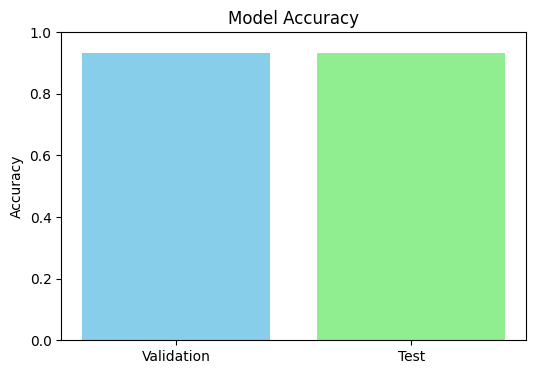

In [13]:
plt.figure(figsize=(6,4))
plt.bar(['Validation', 'Test'], [val_accuracy, test_accuracy], color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.show()

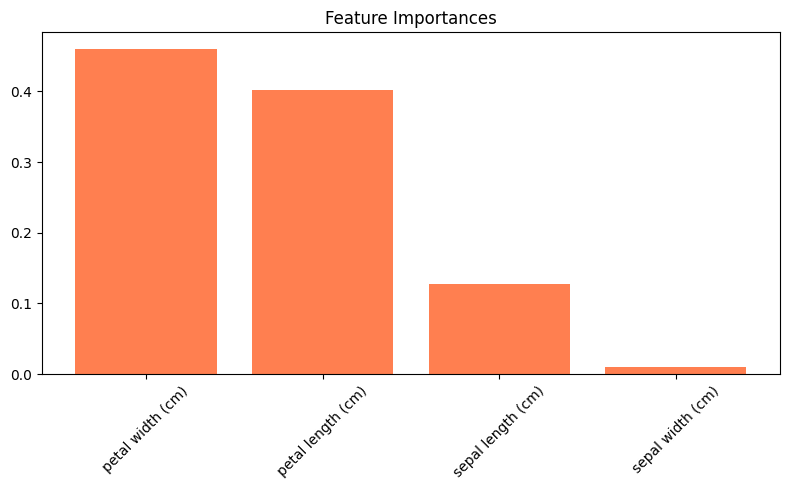

In [14]:
importances = model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,5))
plt.title('Feature Importances')
plt.bar(range(len(importances)), importances[indices], color='coral', align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()